In [ ]:
#εγκατάσταση πακέτου PyOD (https://pyod.readthedocs.io/en/latest/)
!pip install pyod

In [15]:
!pip install pyod

In [26]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pyod.models.ecod import ECOD
from pyod.models.ecod import ECOD
import matplotlib.pyplot as plt

In [27]:
#εισαγωγή του συνόλου δεδομένων
network_data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/network_traffic_data.csv', delimiter=',')

In [28]:
#εξαγωγή χαρακτηριστικών (ανεξάρτητων μεταβλητών) για την αναγνώριση ανωμαλιών
features = ['src_port', 'dest_port', 'packet_size', 'num_packets',
            'flow_duration', 'bytes_transferred', 'packet_rate']

X = network_data[features].values

In [29]:
#κλιμάκωση δεδομένων
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
#χρήση αλγορίθμου ecod
model = ECOD()
model.fit(X_scaled)

ECOD(contamination=0.1, n_jobs=1)

In [37]:
# ---- ECOD ----
ecod = ECOD()
ecod.fit(X)
y_pred_ecod = ecod.labels_
scores_ecod = ecod.decision_scores_
print("Ανωμαλιες ECOD (πληθος) :", int(y_pred_ecod.sum()))

Ανωμαλιες ECOD (πληθος) : 100


In [38]:
#πρόβλεψη βαθμού ανωμαλίας (anomaly score)
anomaly_scores = model.decision_function(X_scaled)

In [39]:
#προσθήκη βαθμού ανωμαλίας (anomaly score) στο σύνολο δεδομένων
network_data['anomaly_score'] = anomaly_scores

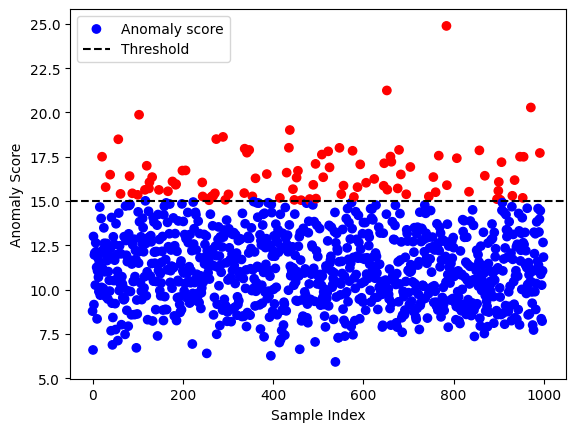

In [40]:

#οπτικοποίηση αποτελεσμάτων, με μπλε οι τιμές που θεωρούνται κανονικές και με κόκκινο όσες καταγράφονται ως ανωμαλίες
colors = ['blue' if score <= model.threshold_ else 'red' for score in anomaly_scores]

plt.scatter(network_data.index, anomaly_scores, c=colors, label='Anomaly score')
plt.axhline(y=model.threshold_, color='black', linestyle='--', label='Threshold')
plt.xlabel('Sample Index')
plt.ylabel('Anomaly Score')
plt.legend()

In [41]:
#τύπωση των τιμών που εντοπίσθηκαν ως ανωμαλίες
anomalies = network_data[network_data['anomaly_score'] > model.threshold_]
print("Detected Anomalies:")
print(anomalies)

Detected Anomalies:
              src_ip          dest_ip  src_port  dest_port protocol  \
21     38.231.226.53  174.108.182.191     64480      62537      UDP   
29     200.39.16.128   82.133.120.224     53943      47622     ICMP   
39      7.222.148.80  183.118.194.113     40803      49797     ICMP   
57      14.119.240.3    156.201.16.65      1167      63332     ICMP   
62    157.250.246.12     250.130.9.97     14171      43486     ICMP   
..               ...              ...       ...        ...      ...   
947  100.219.255.155   171.180.70.107      7334      65534      TCP   
953    140.172.9.227    31.104.83.128     19649      59071     ICMP   
955   154.33.242.128  197.210.145.133     20173      39314      UDP   
971   25.114.146.108    70.89.225.157      6494       4699      UDP   
991   134.102.165.84   167.185.202.84     11590       1052      UDP   

     packet_size  num_packets  flow_duration  bytes_transferred  packet_rate  \
21      1.498648           48             81   